# Gemaakt op 13/05/2025 door martijn

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeRegressor

In [4]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None,
                          feature_names=features,
                          filled=True, rounded=True,
                          special_characters=True)

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your decision tree model to make predictions for both the train and test set.<br>
<br>

![](https://i.imgur.com/0v1CGNV.png)<br>
- Which depth and features did you add per cycle?
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?<br>
<br>

Findings: ...

ik ga hiervoor werken met de positive ratio gebaseerd op user_reviews

In [6]:
games = pd.read_csv("./games.csv")
games['positive_ratio'] = games['positive_ratio'].fillna(games['positive_ratio'].mean())
games['user_reviews'] = games['user_reviews'].fillna(games['user_reviews'].mean())
games['price_final'] = games['price_final'].fillna(games['price_final'].mean())
games['price_original'] = games['price_original'].fillna(games['price_original'].mean())
games['discount'] = games['discount'].fillna(games['discount'].mean())
games_train, games_test = train_test_split(games, test_size=0.3, random_state=42, stratify=games['linux'])
print(games_train.shape, games_test.shape)

(35610, 13) (15262, 13)


ik heb hier de dataset ingeladen, de NaN values gevuld met de mean en de dataset opgesplitst in 2 datasets

<Axes: >

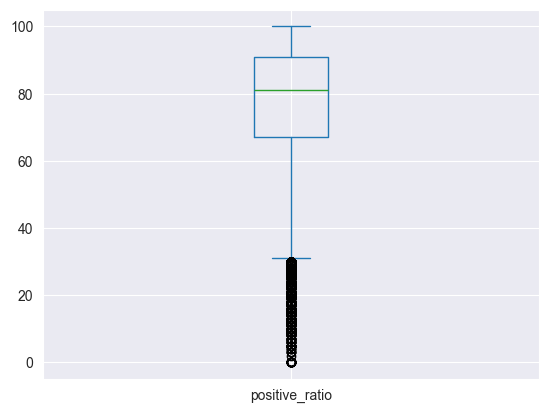

In [7]:
games["positive_ratio"].plot(kind="box")

okay, aangezien de ratio maar tot 100 gaat, ga ik er vanuit dat de RMSE tussen de 0 en 5 zit. En ik denk ook dat het verschil tussen de traingin en test RMSE ongeveer 3 is.

In [8]:
features= ['user_reviews']
dt_regression = DecisionTreeRegressor(max_depth = 2)
dt_regression.fit(games_train[features].values, games_train['positive_ratio'].values)

DecisionTreeRegressor(max_depth=2)

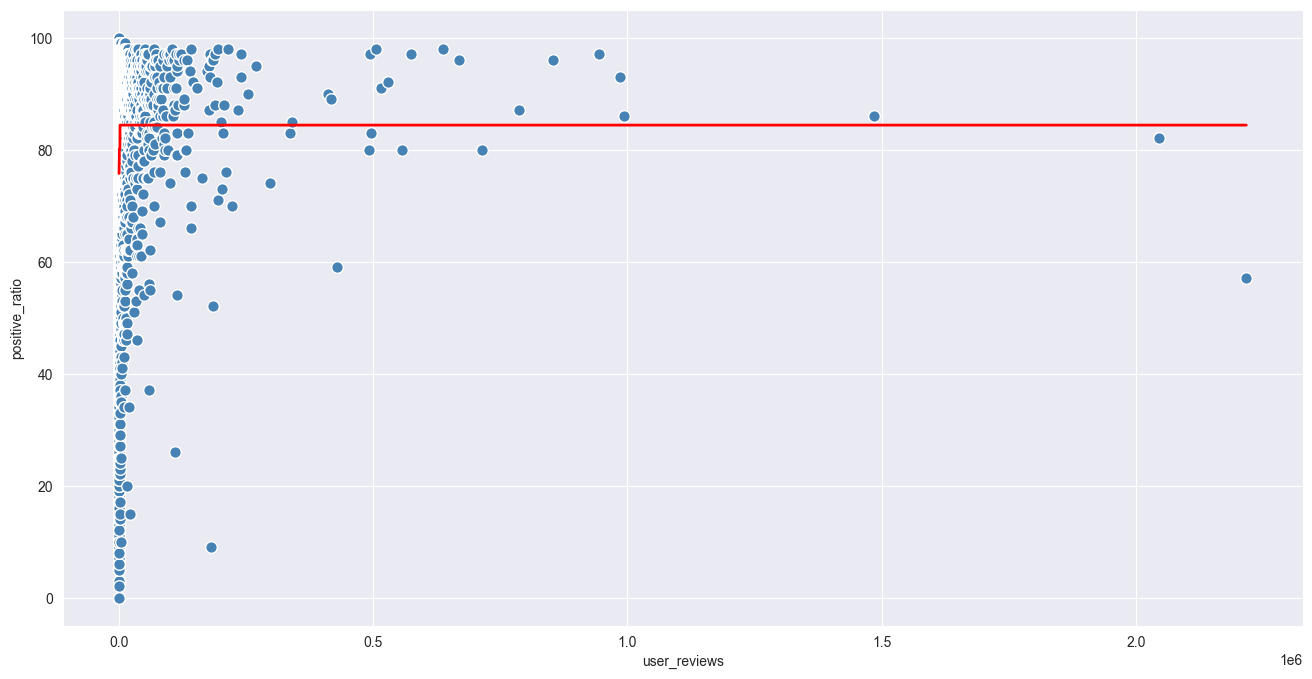

In [10]:
import matplotlib.pyplot as plt

X_train=games_train[features].values
y_train=games_train['positive_ratio'].values

sort_idx = X_train.flatten().argsort()
X_train = X_train[sort_idx]
y_train = y_train[sort_idx]

plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, c='steelblue',
            edgecolor='white', s=70)
plt.plot(X_train, dt_regression.predict(X_train),
         color='red', lw=2)
plt.xlabel('user_reviews')
plt.ylabel('positive_ratio')
plt.show()

wat mooi bahhahahah

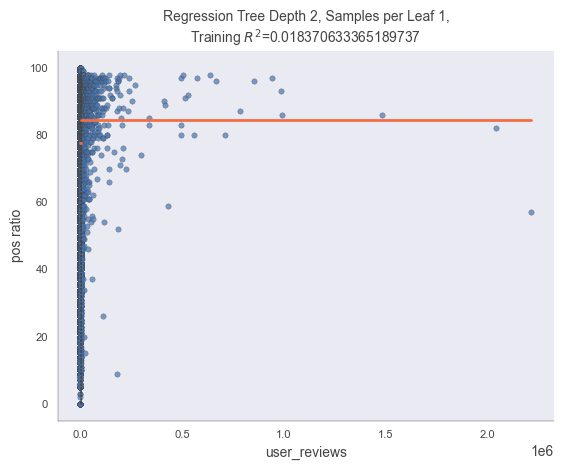

In [11]:
import dtreeviz
viz_rmodel = dtreeviz.model(dt_regression, X_train, y_train,
                            feature_names=features,
                            target_name='pos ratio')
viz_rmodel.rtree_feature_space(features=features)

ik heb er vrij weinig vertrouwen in als ik dit zo zie


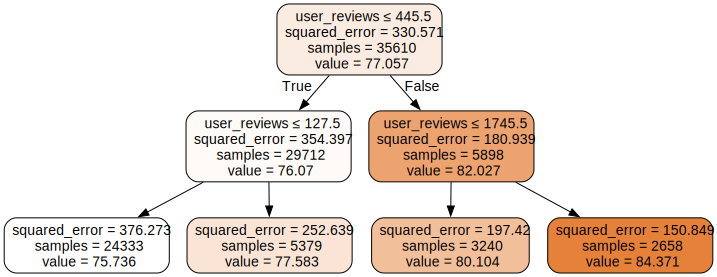

In [12]:
plot_tree_regression(dt_regression, features)

de items worden gesorteerd op value zie ik hier, in de vorige assignment had ik het fout gezegt. hij sorteert niet op squared error maar op value


In [15]:
predictionsOnTrainset = dt_regression.predict(games_train[features])
predictionsOnTestset = dt_regression.predict(games_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, games_train.positive_ratio)
rmseTest = calculate_rmse(predictionsOnTestset, games_test.positive_ratio)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 18.013835394341843
RMSE on test set 18.26762884036745


C:\Users\oldma\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\oldma\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names


ik zat volledig fout, maar nu gaan we het nog een keer proberen met een depth van 6

In [16]:
features= ['user_reviews']
dt_regression = DecisionTreeRegressor(max_depth = 6)
dt_regression.fit(games_train[features].values, games_train['positive_ratio'].values)

DecisionTreeRegressor(max_depth=6)

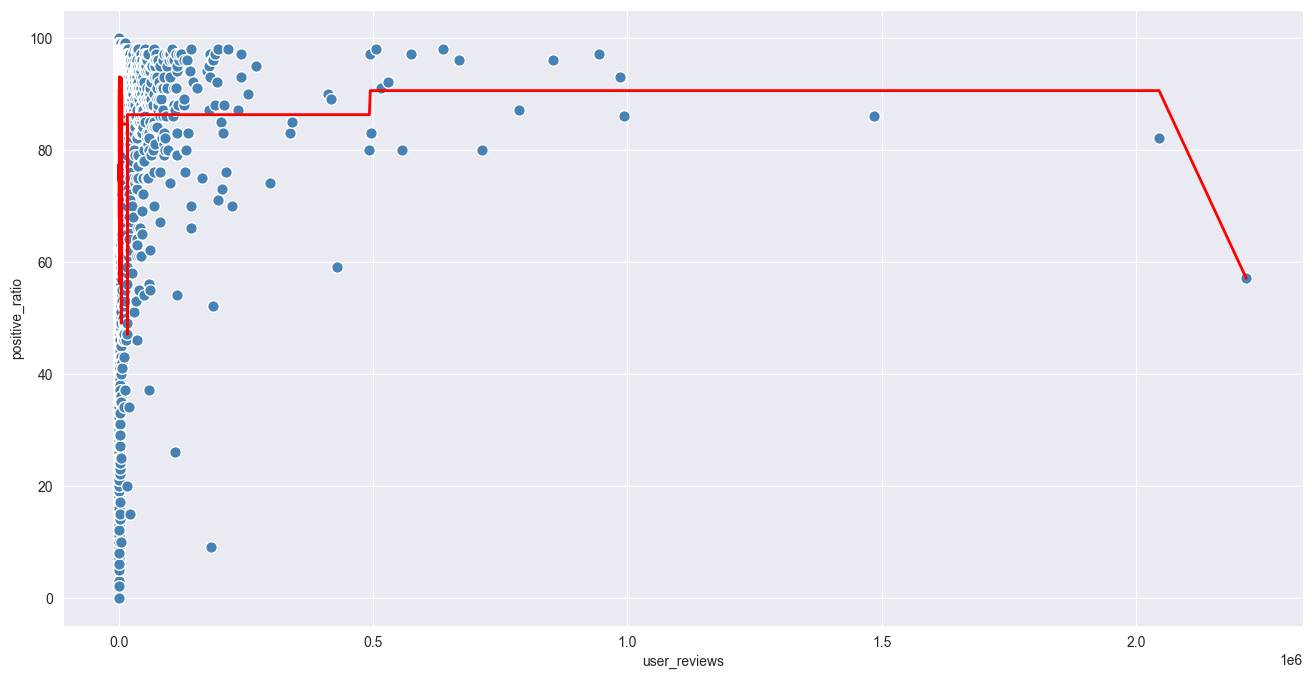

In [17]:
X_train=games_train[features].values
y_train=games_train['positive_ratio'].values

sort_idx = X_train.flatten().argsort()
X_train = X_train[sort_idx]
y_train = y_train[sort_idx]

plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, c='steelblue',
            edgecolor='white', s=70)
plt.plot(X_train, dt_regression.predict(X_train),
         color='red', lw=2)
plt.xlabel('user_reviews')
plt.ylabel('positive_ratio')
plt.show()

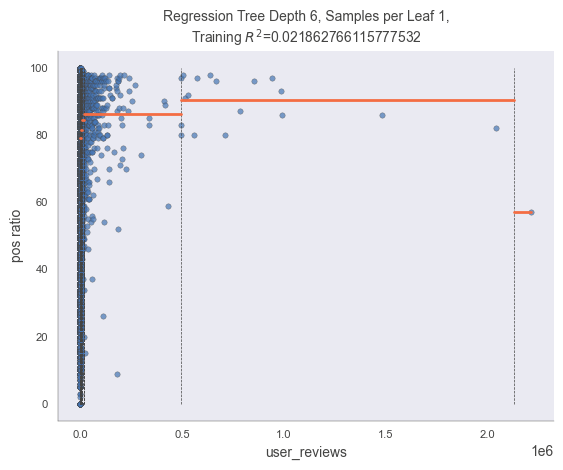

In [18]:
import dtreeviz
viz_rmodel = dtreeviz.model(dt_regression, X_train, y_train,
                            feature_names=features,
                            target_name='pos ratio')
viz_rmodel.rtree_feature_space(features=features)

dit ziet er al wat beter uit

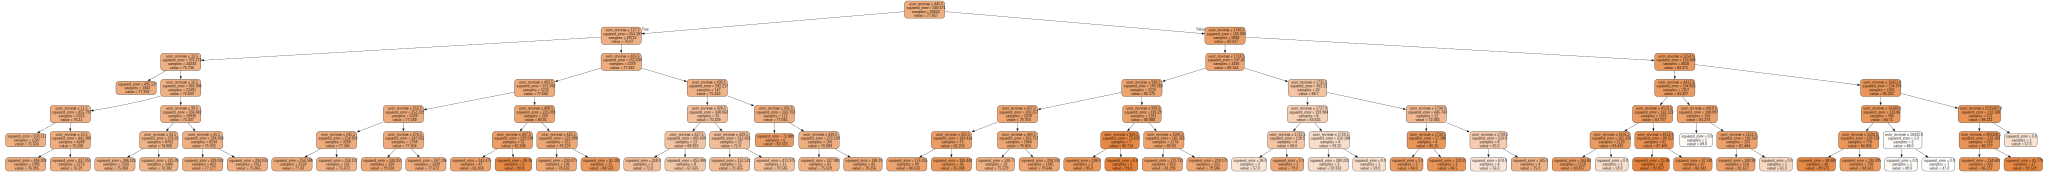

In [19]:
plot_tree_regression(dt_regression, features)

okay ik was dus net weer fout, hij sorteert het ook niet op value

In [20]:
predictionsOnTrainset = dt_regression.predict(games_train[features])
predictionsOnTestset = dt_regression.predict(games_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, games_train.positive_ratio)
rmseTest = calculate_rmse(predictionsOnTestset, games_test.positive_ratio)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 17.981764862503244
RMSE on test set 18.271039113643898


C:\Users\oldma\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
C:\Users\oldma\anaconda3\envs\datascience\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names


## findings

de depth maakt het Root Mean Squared Error niet veel kleiner.
De RMSE liggen bij de training en test set dicht bij elkaar.

Het lijkt alsof er niet echt een verband zit tussen de positive_ratio en user_reviews